# Industry 4.0 의 중심, AI - ML&DL

<div align='right'><font size=2 color='gray'>Machine Learning & Deep Learning with TensorFlow @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, 김진수</font></div>
<hr>

In [1]:
from images import bigpycraft_ai as bpc
from IPython.display import Image 
from tqdm import tqdm_notebook

# Sect3. Cost 최소화기법, How to minimize cost

<hr>
## <font color='brown'> Cost minimize 1 </font>
<!-- lab03_minimize01.py -->

### <font color="#CC5555"> 간단한 가설, Linear Model </font>

### Our hypothesis for linear model X * W
> hypothesis = X * W
<br><br><br>
$$H(x) = Wx$$

### cost/loss function
> cost = tf.reduce_mean(tf.square(hypothesis - Y))
<br><br><br>
$$cost(W) = \frac{1}{m} \sum^m_{i=1}(H(x^{(i)}-y^{(i)})^2$$

C:\Python\Anaconda3-50\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


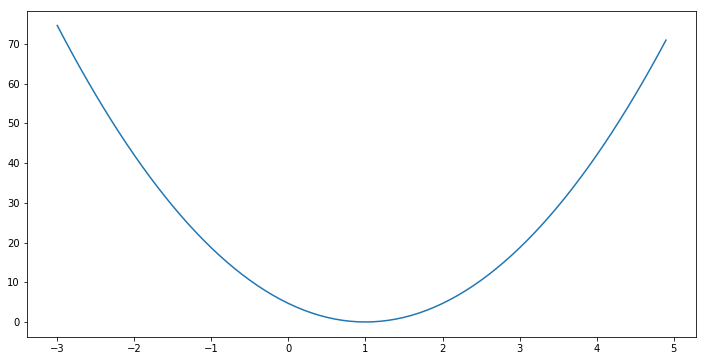

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [12,6]

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

# Show the cost function
plt.plot(W_val, cost_val)
plt.show()


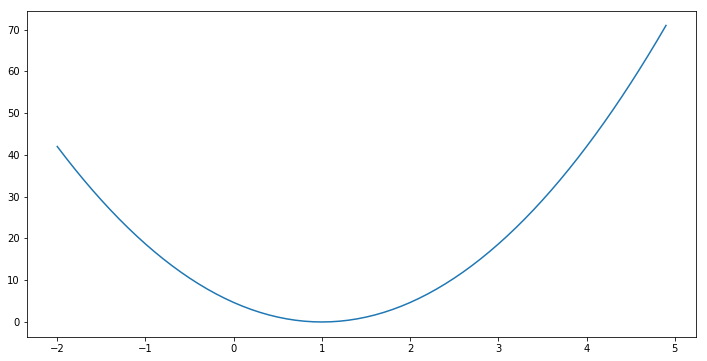

In [3]:
# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-20, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

<hr>
``` python
# tf.train.GradientDescentOptimizer(learning_rate=0.1)

Init signature: tf.train.GradientDescentOptimizer(learning_rate, use_locking=False, name='GradientDescent')
Docstring:     
Optimizer that implements the gradient descent algorithm.
  
Init docstring:
Construct a new gradient descent optimizer.

Args:
  learning_rate: A Tensor or a floating point value.  The learning
    rate to use.
  use_locking: If True use locks for update operations.
  name: Optional name prefix for the operations created when applying
    gradients. Defaults to "GradientDescent".

```


<hr>
``` python 
# optimizer.minimize(cost)

Signature: optimizer.minimize(loss, global_step=None, var_list=None, gate_gradients=1, aggregation_method=None, colocate_gradients_with_ops=False, name=None, grad_loss=None)
Docstring:
Add operations to minimize `loss` by updating `var_list`.

This method simply combines calls `compute_gradients()` and
`apply_gradients()`. If you want to process the gradient before applying
them call `compute_gradients()` and `apply_gradients()` explicitly instead
of using this function.

```

<hr>
## <font color='brown'> Cost minimize 2 </font>
<!-- lab03_minimize02.py -->

### <font color="#CC5555"> Gradient descent </font>

$$cost(W) = \frac{1}{m} \sum^m_{i=1}(H(x^{(i)}-y^{(i)})^2$$

$$W := W - a\frac{1}{m} \sum^m_{i=1}(Wx^{(i)}-y^{(i)})x^{(i)}$$

In [4]:
import tensorflow as tf

x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Our hypothesis for linear model X * W
hypothesis = X * W

# cost/loss function
cost = tf.reduce_sum(tf.square(hypothesis - Y))

# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    # print(step, sess.run(cost, feed_dict={X: x_data, Y: y_data}), sess.run(W))    
    print("step={step},   \t sess_cost={sess_cost},    \t W={sess_W}".format(
            step=step, 
            sess_cost=sess.run(cost, feed_dict={X: x_data, Y: y_data}), 
            sess_W=sess.run(W)
            ));


step=0,   	 sess_cost=0.5448659658432007,    	 W=[0.802721]
step=1,   	 sess_cost=0.15498393774032593,    	 W=[0.89478457]
step=2,   	 sess_cost=0.04408436641097069,    	 W=[0.9438851]
step=3,   	 sess_cost=0.012539566494524479,    	 W=[0.97007203]
step=4,   	 sess_cost=0.0035668062046170235,    	 W=[0.9840384]
step=5,   	 sess_cost=0.0010145555716007948,    	 W=[0.99148715]
step=6,   	 sess_cost=0.000288588460534811,    	 W=[0.9954598]
step=7,   	 sess_cost=8.208797953557223e-05,    	 W=[0.99757856]
step=8,   	 sess_cost=2.334947930648923e-05,    	 W=[0.99870855]
step=9,   	 sess_cost=6.64206800138345e-06,    	 W=[0.9993112]
step=10,   	 sess_cost=1.8890452793129953e-06,    	 W=[0.99963266]
step=11,   	 sess_cost=5.373175326894852e-07,    	 W=[0.9998041]
step=12,   	 sess_cost=1.528826629737523e-07,    	 W=[0.9998955]
step=13,   	 sess_cost=4.346226845086676e-08,    	 W=[0.99994427]
step=14,   	 sess_cost=1.23741763502494e-08,    	 W=[0.99997026]
step=15,   	 sess_cost=3.5306157997183

<hr>
## <font color='brown'> Cost minimize 3 </font>
<!-- lab03_minimize03.py -->

In [5]:
import tensorflow as tf

# tf Graph Input
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.0)

# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()


In [6]:
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

W_val = []
step_val = []

for step in range(101):
    W_val.append(sess.run(W))
    step_val.append(step)
    
    if step % 10 == 0 or step < 10:
        # print(step, sess.run(W))
        print("step={step}, \t W={W_val}".format(
            step=step, W_val=sess.run(W)
            )); 
                
    sess.run(train)
    

step=0, 	 W=5.0
step=1, 	 W=1.2666664123535156
step=2, 	 W=1.0177778005599976
step=3, 	 W=1.0011851787567139
step=4, 	 W=1.0000790357589722
step=5, 	 W=1.0000052452087402
step=6, 	 W=1.0000003576278687
step=7, 	 W=1.0
step=8, 	 W=1.0
step=9, 	 W=1.0
step=10, 	 W=1.0
step=20, 	 W=1.0
step=30, 	 W=1.0
step=40, 	 W=1.0
step=50, 	 W=1.0
step=60, 	 W=1.0
step=70, 	 W=1.0
step=80, 	 W=1.0
step=90, 	 W=1.0
step=100, 	 W=1.0


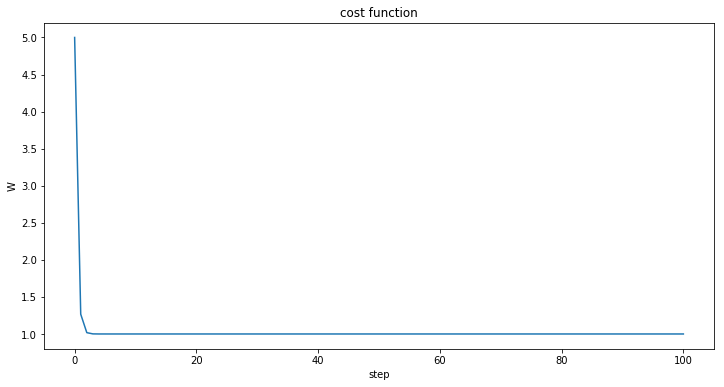

In [7]:
# Show the cost function
plt.plot(step_val, W_val)
plt.title('cost function')
plt.xlabel('step')
plt.ylabel('W')
plt.show()

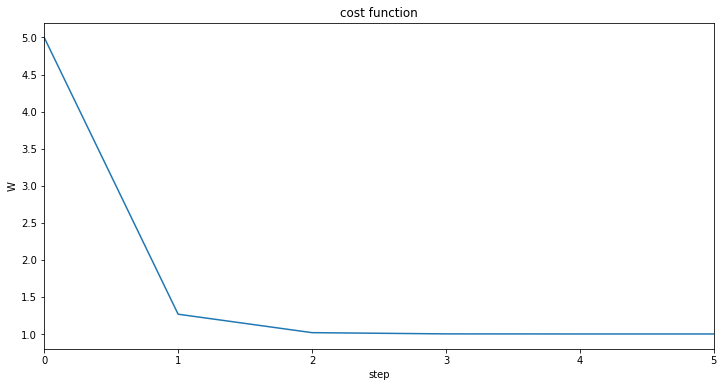

In [8]:
# Show the cost function
plt.plot(step_val, W_val)
plt.title('cost function')
plt.xlabel('step')
plt.ylabel('W')
plt.xlim(0, 5)
plt.show()

In [9]:
type(train)

tensorflow.python.framework.ops.Operation

In [10]:
import tensorflow as tf

# tf Graph Input
X = [1, 2, 3]
Y = [2, 4, 6]

# Set wrong model weights
W = tf.Variable(-7.0)

# Linear model
hypothesis = X * W

# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

# tensorboard for graph
writer = tf.summary.FileWriter("./graph/sect03", sess.graph)


In [11]:
sess.graph

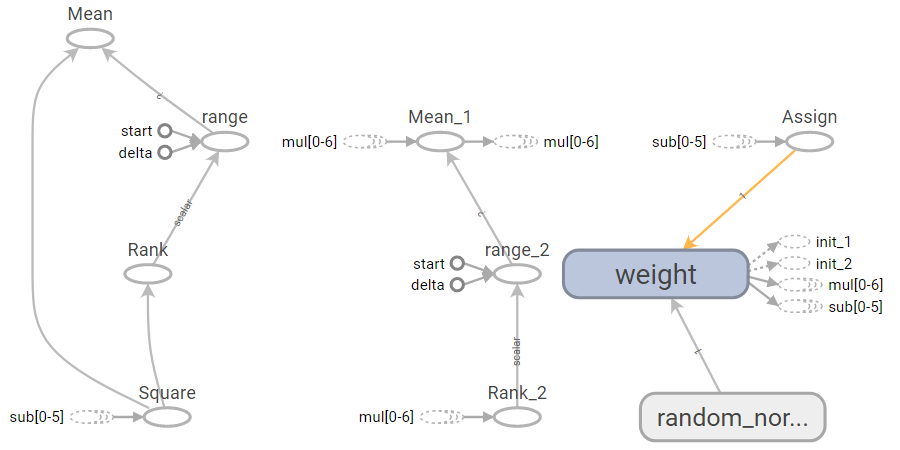

In [12]:
bpc.Figure(bpc.ML03_IMG_01)

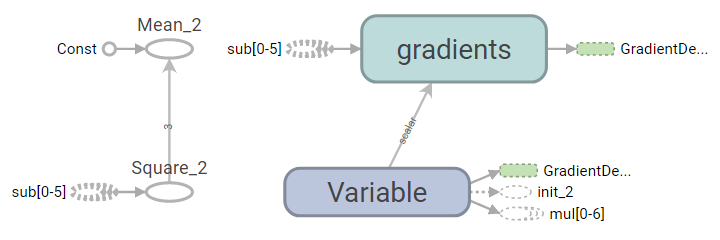

In [13]:
bpc.Figure(bpc.ML03_IMG_02)

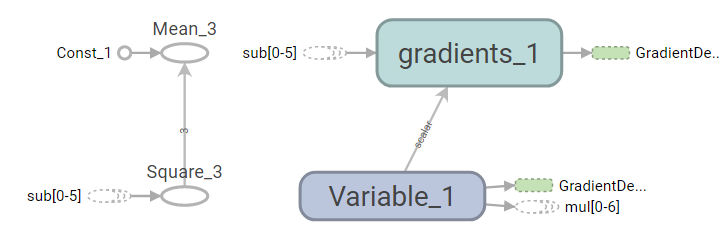

In [14]:
bpc.Figure(bpc.ML03_IMG_03)

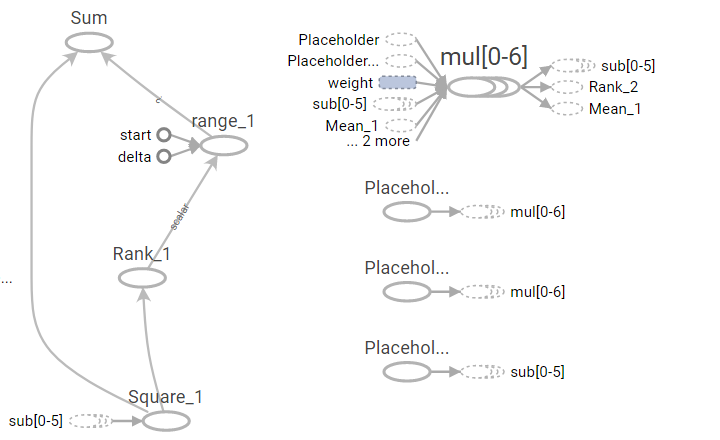

In [15]:
bpc.Figure(bpc.ML03_IMG_04)

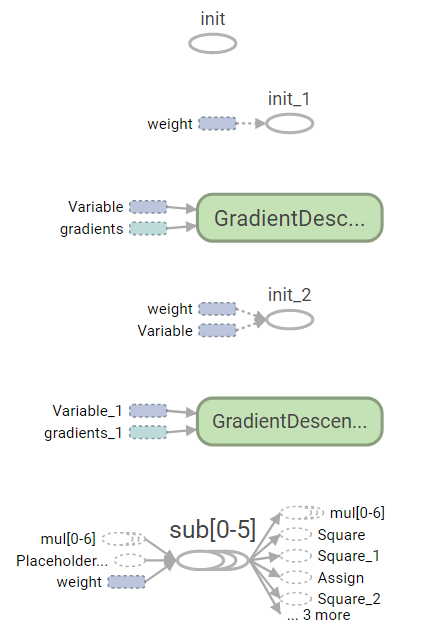

In [16]:
bpc.Figure(bpc.ML03_IMG_05)

In [17]:
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(101):
    
    if step % 10 == 0 or step < 10:
        # print(step, sess.run(W))
        print("step={step}, \t W={W_val}".format(
            step=step, W_val=sess.run(W)
            ));    
    sess.run(train)

step=0, 	 W=-7.0
step=1, 	 W=1.4000005722045898
step=2, 	 W=1.9600000381469727
step=3, 	 W=1.997333288192749
step=4, 	 W=1.9998222589492798
step=5, 	 W=1.999988079071045
step=6, 	 W=1.9999991655349731
step=7, 	 W=1.9999998807907104
step=8, 	 W=2.0
step=9, 	 W=2.0
step=10, 	 W=2.0
step=20, 	 W=2.0
step=30, 	 W=2.0
step=40, 	 W=2.0
step=50, 	 W=2.0
step=60, 	 W=2.0
step=70, 	 W=2.0
step=80, 	 W=2.0
step=90, 	 W=2.0
step=100, 	 W=2.0


In [18]:
W_val = sess.run(W)
W_val

2.0

<hr>
## <font color='brown'>TensorBoard, 텐서보드 사용법 </font>
> TensorBoard는 TensorFlow에 기록된 로그를 그래프로 시각화시켜서 보여주는 도구 이다

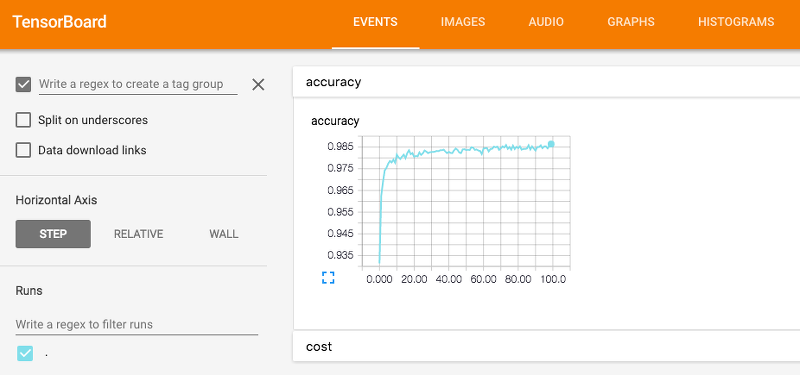

In [19]:
bpc.Figure(bpc.ML01_IMG_10)

### <font color='brown'> 1. TensorBoard 실행 </font>
>  
- tensorboard --logdir=./graph/sample
- 루트(/) 폴더 밑의 tmp 폴더 밑의 sample 폴더에 기록된 로그를 보겠다,라는 명령.
- logdir 뒤에는 로그가 기록된 폴더를 명시한다.
<br/><br/>
<textarea rows="4" cols="120" horizontal diabled>
기록된 폴더는 소스 코드를 구동시킬 때 명시하게 되어 있다.
즉, 소스 코드를 구동하지 않으면 로그도 없으므로 볼 것도 없다.
다만 로그가 그냥 기록되는 것은 아니고 소스 코드에 직접 관련 코드를 넣어야 한다.
</textarea>

### <font color='brown'> 2. tensorboard 정체 </font>
>  
- 앞에서 실행한 명령의 tensorboard는
- 파이썬 설치 폴더 아래의 tensorflow 폴더 밑에 있는 tensorboard.py 파일을 가리킨다.
<br/><br/>
<textarea rows="3" cols="120" horizontal diabled>
맥에서 tensorboard.py 파일의 위치
%PYTHON_HOME%/site-packages/tensorflow/tensorboard/tensorboard.py
</textarea>


### <font color='brown'> 3. 로그 위치 </font>
>  
- 소스 코드에서 로그를 기록하기 위한 코드이다.
- writer = tf.train.SummaryWriter("/tmp/test_logs", session.graph)
<br/><br/>
<textarea rows="3" cols="120" horizontal diabled>
소스 코드를 구동하면 "./graph/test_logs" 폴더에 확장자가 local인 파일이 생성된다.
-rw-r--r--   1 nbuser  nbuser  681  Oct 20 07:25 events.out.tfevents.1538279520.BigpyCraftuiMBP
</textarea>
<br/><br/>
- 파일 이름이 꽤 길고 복잡하다.
- 이 파일이 있어야 tensorboard에서 결과를 볼 수 있다.


### <font color='brown'> 4. 포트 번호 </font>
>  
- tensorboard 기본 포트번호는 6006이다. 필요에 따라 포트 번호를 바꿀 수 있다.
- tensorboard --logdir=/graph/sample --port=9999
<br/><br/>
- tensorboard 명령을 실행할 때 port 옵션을 사용해서 포트 번호를 지정할 수 있다.
- 동시에 여러 개의 로그를 보고 싶을 때 사용할 수 있다.


### <font color='brown'> 5. 웹 브라우저 </font>
>  
- 콘솔에서 명령을 입력했을 때, 출력된 메시지를 보면 ip 주소가 나온다.
- 웹 브라우저를 열고 해당 주소와 포트 번호를 입력하면 그래프를 볼 수 있다.
<br/><br/>
<textarea rows="3" cols="120" horizontal diabled>
입력 주소에는 두 가지가 있다.
0.0.0.0:6006 또는 localhost:6006
</textarea>



### <font color='brown'> 6. tensorboard 종료 </font>
>  
- 웹 브라우저는 단순히 로그를 시각화하는 역할만 한다.
- 웹 브라우저를 종료한다고 해서 tensorboard가 종료되는 것이 아니다.
<br/><br/>
- tensorboard 명령을 입력하면 해당 콘솔은 블록(대기) 상태로 들어간다.
- ctrl+c를 입력하면 tensorboard가 종료된다. 맥에서도 ctrl+c를 사용한다. cmd+c가 아니다.


### <font color='brown'> 7. 주의사항 </font>
>  
- tensorboard를 실행하면 콘솔 창에 알 수 없는 경고가 뜬다.
<br/> 결론적으로 결과를 보는 데에는 지장이 없다. 구글링해도 나오지 않는다.
<br/><br/>
<textarea rows="5" cols="120" horizontal diabled>
WARNING:tensorflow:IOError [Errno 2] No such file or directory: 
    '/usr/local/lib/python3.6/site-packages/tensorflow/tensorboard/TAG' 
    on path /usr/local/lib/python3.6/site-packages/tensorflow/tensorboard/TAG
WARNING:tensorflow:Unable to read TensorBoard tag
</textarea>
<br/><br/>
- 또 하나는 로그 폴더를 잘못 입력해도 문제가 발생하지 않는다.
<br/> 다만 웹 브라우저에 결과가 나타나지 않을 뿐이다.
<br/> tensorboard 입장에서는 폴더가 없다고 해서 이상한 행동을 할 필요는 없다고 보는 듯..
<br/> 처음에 폴더 지정이 어색해서 여러 번 실수를 했다.
<br/><br/>
- 로그 결과는 계속 누적된다.
<br/> 이전 결과는 사라지지 않고 남아 있다. 그러나, 웹 브라우저에서는 최신의 결과만 볼 수 있다.
<br/> 이전 결과를 볼 수는 있겠지만, 화면에서 예전 결과를 선택하는 방법은 찾지 못했다.
<br/><br/>
- 이전 로그가 있을 때 뜨는 경고 메시지.
<br/> WARNING:tensorflow:Found more than one graph event per run. Overwriting the graph with the newest event.



### <font color='brown'> 8. TensorBoard 예제 </font>

#### <font color='#EE0000'> 8-1. 예제 </font>
>  tensorboard에 점 하나 찍는 예제


``` python

import tensorflow as tf

a = tf.constant(3.0)
b = tf.constant(5.0)
c = a * b

# tensorboard에 point라는 이름으로 표시됨
c_summary = tf.summary.scalar('point', c)
merged = tf.summary.merge_all()

with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graph/sample_1', sess.graph)

    result = sess.run([merged])
    sess.run(tf.global_variables_initializer())

    writer.add_summary(result[0])
```

In [20]:
import tensorflow as tf

a = tf.constant(3.0)
b = tf.constant(5.0)
c = a * b

# tensorboard에 point라는 이름으로 표시됨
c_summary = tf.summary.scalar('point', c)
merged = tf.summary.merge_all()

with tf.Session() as sess:
    writer = tf.summary.FileWriter('./graph/sample_1', sess.graph)

    result = sess.run([merged])
    sess.run(tf.global_variables_initializer())

    writer.add_summary(result[0])



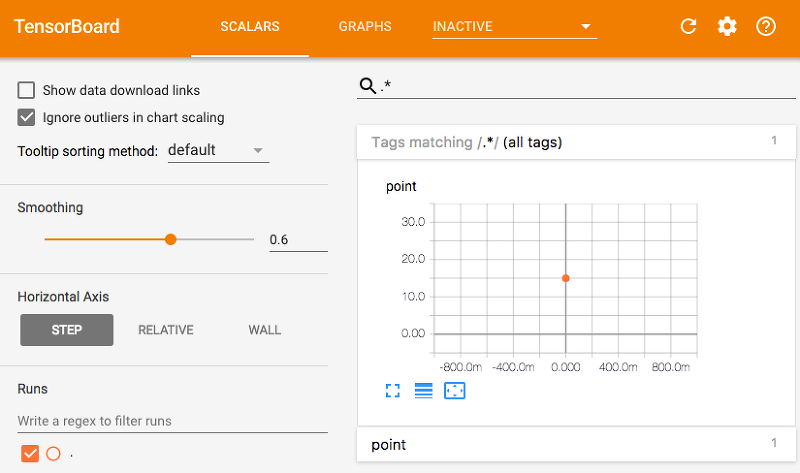

In [21]:
bpc.Figure(bpc.ML01_IMG_11)

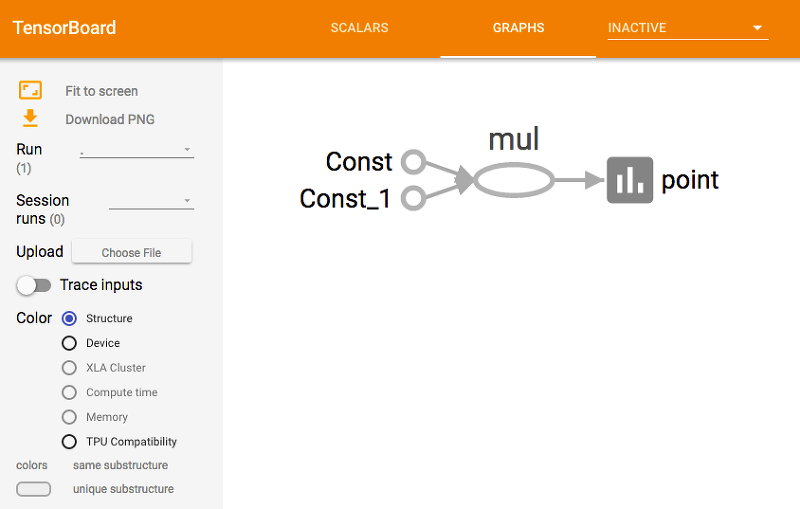

In [22]:
bpc.Figure(bpc.ML01_IMG_12)

#### <font color='#EE0000'> 8-2. 예제 </font>
>  두 개의 직선을 출력하는 예제. 김성훈 교수님께서 말씀하신 5단계를 순서대로 보여준다.

``` python

import tensorflow as tf

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

add = tf.add(X, Y)
mul = tf.multiply(X, Y)

# step 1: node 선택
add_hist = tf.summary.scalar('add_scalar', add)
mul_hist = tf.summary.scalar('mul_scalar', mul)

# step 2: summary 통합. 두 개의 코드 모두 동작.
merged = tf.summary.merge_all()
# merged = tf.summary.merge([add_hist, mul_hist])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # step 3: writer 생성
    writer = tf.summary.FileWriter('./graph/sample_2', sess.graph)

    for step in range(100):
        # step 4: 노드 추가
        summary = sess.run(merged, feed_dict={X: step * 1.0, Y: 2.0})
        writer.add_summary(summary, step)

# step 5: 콘솔에서 명령 실행
# tensorboard --logdir=./board/sample_2
# 콘솔 폴더가 현재 폴더(.)가 아니라면, 절대 경로 지정
# tensorboard --logdir=~/PycharmProjects/test/graph/sample_2


```

In [23]:
import tensorflow as tf

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

add = tf.add(X, Y)
mul = tf.multiply(X, Y)

# step 1: node 선택
add_hist = tf.summary.scalar('add_scalar', add)
mul_hist = tf.summary.scalar('mul_scalar', mul)

# step 2: summary 통합. 두 개의 코드 모두 동작.
merged = tf.summary.merge_all()
# merged = tf.summary.merge([add_hist, mul_hist])

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    # step 3: writer 생성
    writer = tf.summary.FileWriter('./graph/sample_2', sess.graph)

    for step in range(100):
        # step 4: 노드 추가
        summary = sess.run(merged, feed_dict={X: step * 1.0, Y: 2.0})
        writer.add_summary(summary, step)

# step 5: 콘솔에서 명령 실행
# tensorboard --logdir=./board/sample_2
# 콘솔 폴더가 현재 폴더(.)가 아니라면, 절대 경로 지정
# tensorboard --logdir=~/PycharmProjects/test/graph/sample_2

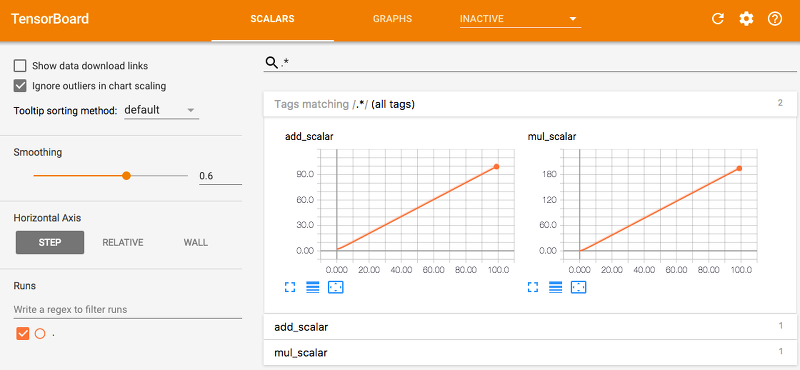

In [24]:
bpc.Figure(bpc.ML01_IMG_21)

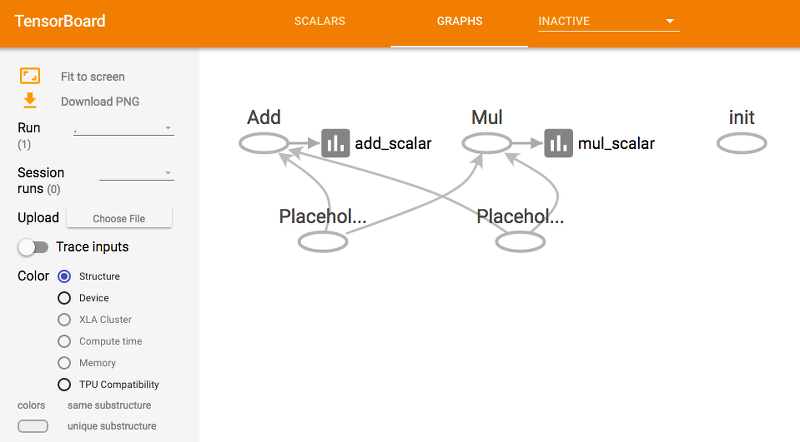

In [25]:
bpc.Figure(bpc.ML01_IMG_22)

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>